# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 7 - Waves

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Waves in 1D

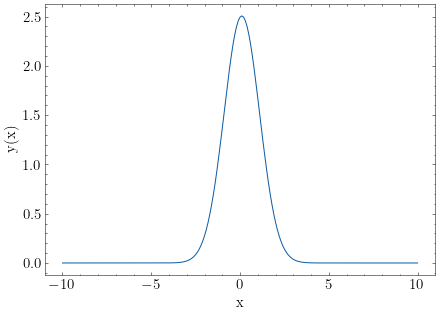

In [266]:
# Gaussian pulse

def pulse(x, mu = 0.0, sigma = 1.0):
    return (1/sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x - mu)**2 / sigma**2)

dx = 0.1
x = np.arange(-10, 10+dx, dx)

plt.plot(x, pulse(x, mu=0.1, sigma=1.0))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [267]:
# Wave propagation

v = 1.0

dx = 0.1
x = np.arange(-10, 10+dx, dx)

dt = dx/v
t = np.arange(0, 10+dt, dt)

Nx = len(x)
Nt = len(t)

u = np.zeros((Nt, Nx))

In [268]:
# Setting initial conditions for v=0 at t=0

u[0] = pulse(x)
u[1] = pulse(x)

# Dirichlet boundaries

u[0][0] = 0.0
u[0][-1] = 0.0

u[1][0] = 0.0
u[1][-1] = 0.0

In [269]:
for n in range(1,99):
    for k in range(1, len(x)-1):
        u[n+1][k] = u[n][k+1] + u[n][k-1] - u[n-1][k] 

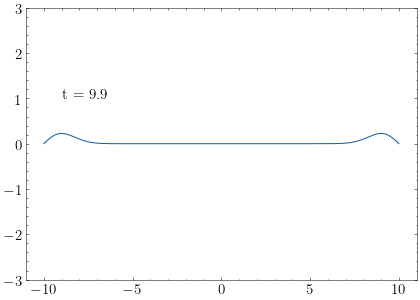

In [270]:
# Doing a simple animation with display

from IPython import display
from time import sleep

for i in range(100):
    plt.plot(x, u[i])
    plt.text(-9, 1.0, f"t = {t[i]:.1f}")
    display.clear_output(wait=True)
    plt.ylim(-3.0, 3.0)
    plt.show()  

In [271]:
# Animating with matplotlib.animate

fig = plt.figure(dpi=100)

def animate(frame):
    fig.clear()
    plt.plot(x, u[frame])
    plt.text(-9, 2.0, f"t = {t[frame]:.1f}")
    plt.ylim(-3.0, 3.0)
    plt.xlim(-10.1, 10.1)
    plt.xlabel('x')
    plt.title('Gaussian pulse with zero velocity')
    plt.draw()
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [272]:
# Setting initial velocity v = 1

u = np.zeros((Nt, Nx))

u[0] = pulse(x, mu=0.0)
u[1] = pulse(x, mu=0.1)

# Dirichlet boundaries

u[0][0] = 0.0
u[0][-1] = 0.0

u[1][0] = 0.0
u[1][-1] = 0.0

for n in range(1,99):
    for k in range(1, len(x)-1):
        u[n+1][k] = u[n][k+1] + u[n][k-1] - u[n-1][k]
        
# Animating with matplotlib.animate

fig = plt.figure(figsize=(6,5),dpi=100)

def animate(frame):
    fig.clear()
    plt.plot(x, u[frame])
    plt.text(-9, 2.0, f"t = {t[frame]:.1f}")
    plt.ylim(-3.0, 3.0)
    plt.xlim(-10.1, 10.1)
    plt.xlabel('x')
    plt.title('Gaussian pulse with v = 1')
    plt.draw()
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

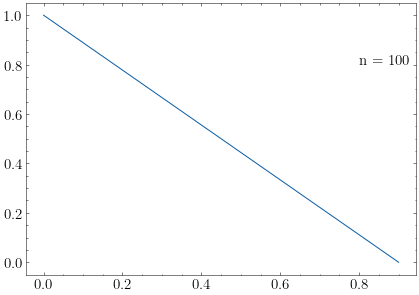

In [273]:
# Relaxation method in 1D

dx = 0.1
x = np.arange(0, 1, dx)

Nx = len(x)
Nt = 100

y = np.zeros((Nt, Nx))

# Boudaries
y[:, 0] = 1.0
y[:, -1] = 0.0

for n in range(Nt-1):
    for i in range(1, Nx-1):
        y[n, i] = 0.5*(y[n, i-1] + y[n, i+1])
        y[n+1] = y[n]
        
# Doing a simple animation with display

for i in range(100):
    plt.plot(x, y[i])
    plt.text(0.8, 0.8, f"n = {i+1}")
    display.clear_output(wait=True)
    plt.show()  

In [274]:
# Relaxation method in 2D

Nt = 10000

border = np.linspace(0, 1, 101)
xv, yv = np.meshgrid(border, border)

V = np.zeros((101,101))
V[:,0] = 5.0
V[:,-1] = -5.0

for n in range(Nt):
    for i in range(1, len(V[0,:])-1):
        for j in range(1, len(V[:,0])-1):
            V_last = V.copy()
            V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
    if np.max(abs(V_last - V)) < 1e-6:
        print(f"Solution converged in {n+1} steps.")
        break
else:
    print(f"Solution failed to converge.")

Solution converged in 1104 steps.


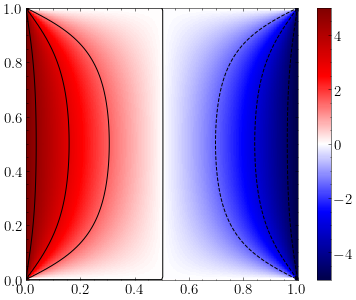

In [275]:
plt.imshow(V, cmap='seismic', origin='lower', vmin=-5.0, vmax=+5.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.show()

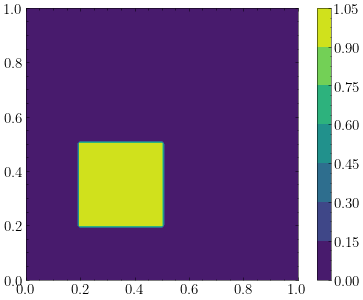

In [276]:
# Defining a square with fixed potential

def fixed_box(x, y):
    box = (x >= 0.2) * (x <= 0.5) * (y >= 0.2) * (y <= 0.5)
    not_box = np.invert(box)
    return np.select([box, not_box], [1.0, 0.0])

plt.contourf(xv, yv, fixed_box(xv, yv))
plt.axis('scaled')
plt.colorbar()
plt.show()

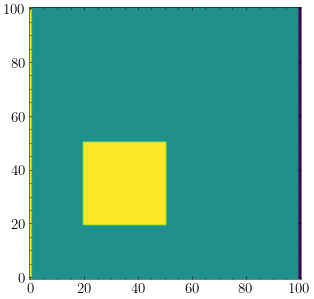

In [277]:
# Building initial guess, boundaries, and initial guess

V = fixed_box(xv, yv)
V[:, -1] = -1
V[:, 0] = +1

plt.imshow(V, origin='lower')
plt.show()

In [278]:
for n in range(Nt):
    for i in range(1, len(V[0,:])-1):
        for j in range(1, len(V[:,0])-1):
            if not(fixed_bool[i,j]):
                V_last = V.copy()
                V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
    if np.max(abs(V_last - V)) < 1e-6:
        print(f"Solution converged in {n+1} steps.")
        break
else:
    print(f"Solution failed to converge.")

Solution converged in 500 steps.


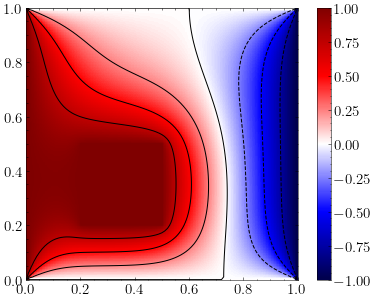

In [279]:
plt.imshow(V, cmap='seismic', origin='lower', vmin=-1.0, vmax=+1.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.show()

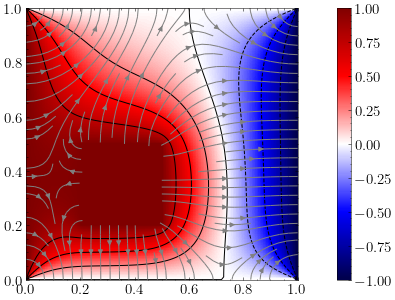

In [280]:
# Calculating the E field

Ey, Ex = np.gradient(-V, dx)
plt.imshow(V, cmap='seismic', origin='lower', vmin=-1.0, vmax=+1.0, extent=(0,1,0,1))
plt.colorbar()
plt.contour(xv, yv, V, colors='black')
plt.streamplot(xv, yv, Ex, Ey, density=1, color='gray')
plt.axis('scaled')
plt.show()